In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/book-report/IMG_8187.jpg
/kaggle/input/book-report/IMG_8191.jpg
/kaggle/input/book-report/IMG_8190.jpg
/kaggle/input/llm-image/IMG_8176.jpg
/kaggle/input/book-review-format/Book Review Format.pdf
/kaggle/input/llm-image2/IMG_8177.jpg
/kaggle/input/math-pdf/IMG_4.jpg
/kaggle/input/math-pdf/IMG_2.jpg
/kaggle/input/math-pdf/IMG_3.jpg
/kaggle/input/math-pdf/IMG_1.jpg


## AI Teacher Guide

A lot of parents struggle to keep pace with homework of kids
I have created an AI Teacher Guide for parents to help check the homework of their kids as well as allow kids to interact with it. Teachers can also use it.

### Use case 1  - AI Teacher Guide evaluates math solution provided by the students. Also evaluates how varied the math problems are.
1) Upload the images of math questions and solutions. 
2) Currently this program iterates through the uploaded images in the specified path, transcribes it
3) Based on few shot prompts, it segregates the questions and solutions in JSON format
4) In order to assess the variety of the questions, I have used embeddings to capture the similarity of the questions. Goal is to check if the questions are of varied nature vs similar.
5) This can be scaled by creating an AI Teacher app, where images or pdf's can be uploaded or google sheet link of the questions and solutions of math problems can be shared and AI Teacher 
provides objective feedback based on the instructions. Also evaluations the distribution of how similar or varied the problems are.

### Use case 2 - AI Teacher Guide helps students get qualitative help in their essays.
1) Upload a pdf document with the guidelines of how to write the essay based on the subject.
2) Upload the the images of the student's writing with clearly marked page numbers.
3) Read the pdf document and store the data. Instruct LLM to transcribe the images.
4) Instruct the LLM to compare the student's work and the pdf guideline provided and provide quantitative feedback and qualitative summary score.
5) Scale this by integrating this functionality with the app. Also create a chatbot where the student can chat and ask specific questions about their work.

### Concepts uitilized
* Structured output/JSON mode/controlled generation
* Few-shot prompting
* Document understanding
* Image understanding
* Embeddings

In [2]:
#A lot of parents struggle to keep pace with homework of kids
#I have created an AI Teacher Guide for parents to check the homework of their kids

#Use case 1  - AI Teacher Guide evaluates math solution provided by the students. Also evaluates how varied the math problems are.
#1) Upload the images of math questions and solutions. 
#2) Currently this program iterates through the uploaded images in the specified path, transcribes it
#3) Based on few shot prompts, it segregates the questions and solutions in JSON format
#4) In order to assess the variety of the questions, I have used embeddings to capture the similarity of the questions. Goal is to check if the questions are of varied nature vs similar.
#5) This can be scaled by creating an AI Teacher app, where images or pdf's can be uploaded or google sheet link of the questions and solutions of math problems can be shared and AI Teacher 
# provides objective feedback based on the instructions. Also evaluations the distribution of how similar or varied the problems are.

#Use case 2 - AI Teacher Guide helps students get qualitative help in their essays.
#1) Upload a pdf document with the guidelines of how to write the essay based on the subject.
#2) Upload the the images of the student's writing with clearly marked page numbers.
#3) Read the pdf document and store the data. Instruct LLM to transcribe the images.
#4) Instruct the LLM to compare the student's work and the pdf guideline provided and provide quantitative feedback and qualitative summary score.
#5) Scale this by integrating this functionality with the app. Also create a chatbot where the student can chat and ask specific questions about their work.

#Concepts utilized
#Structured output/JSON mode/controlled generation
#Few-shot prompting
#Document understanding
#Image understanding
#Embeddings


In [3]:
!pip uninstall -qqy jupyterlab kfp  # Remove unused conflicting packages
# Remove conflicting packages from the Kaggle base environment.
#!pip uninstall -qqy kfp jupyterlab libpysal thinc spacy fastai ydata-profiling google-cloud-bigquery google-generativeai
!pip install -U -q "google-genai==1.7.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 3.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 3.7 MB/s eta 0:00:00


In [4]:
from google import genai
from google.genai import types

genai.__version__

'1.7.0'

In [5]:
from google.api_core import retry


is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

genai.models.Models.generate_content = retry.Retry(
    predicate=is_retriable)(genai.models.Models.generate_content)

In [6]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

In [7]:
client = genai.Client(api_key=GOOGLE_API_KEY)

for model in client.models.list():
  #if 'embedContent' in model.supported_actions:
    for a in model.supported_actions:
        print('Model Name - ' + model.name + ', Actions - ' + a)

#Read image - models/gemini-2.0-flash-lite-001
#models/gemini-pro-vision
#Check which models are used for what functionality

Model Name - models/embedding-gecko-001, Actions - embedText
Model Name - models/embedding-gecko-001, Actions - countTextTokens
Model Name - models/gemini-1.0-pro-vision-latest, Actions - generateContent
Model Name - models/gemini-1.0-pro-vision-latest, Actions - countTokens
Model Name - models/gemini-pro-vision, Actions - generateContent
Model Name - models/gemini-pro-vision, Actions - countTokens
Model Name - models/gemini-1.5-pro-latest, Actions - generateContent
Model Name - models/gemini-1.5-pro-latest, Actions - countTokens
Model Name - models/gemini-1.5-pro-001, Actions - generateContent
Model Name - models/gemini-1.5-pro-001, Actions - countTokens
Model Name - models/gemini-1.5-pro-001, Actions - createCachedContent
Model Name - models/gemini-1.5-pro-002, Actions - generateContent
Model Name - models/gemini-1.5-pro-002, Actions - countTokens
Model Name - models/gemini-1.5-pro-002, Actions - createCachedContent
Model Name - models/gemini-1.5-pro, Actions - generateContent
Model 

## Image Processing
Multiple image transcription and correction by AI Teacher
Document Understanding, Image understanding

In [8]:
import os
from PIL import Image

def image_reader(image_folder, zero_shot_prompt):
    #image_folder = '/kaggle/input/math-pdf/'
    
    images = []
    
    for file in os.listdir(image_folder):
        if file.lower().endswith(('.jpg','.png','.jpeg')):
            image_path = os.path.join(image_folder, file)
            images.append(Image.open(image_path))
        else:
            print('Not an image')
    
    try:
    
        response = client.models.generate_content(
            model='models/gemini-2.0-flash',
            contents=[zero_shot_prompt,images]
        )
        #print(response.text)
        
        #next_input = response
    
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

    return response.text

In [9]:
zero_shot_prompt = '''This is math paper attempted by a student. The student's answer are writen in pencil. 
Transcribe this set of images without any corrections. Please ignore initial examples marked as Ex. Don't use any notations.'''

next_input = image_reader('/kaggle/input/math-pdf/', zero_shot_prompt)

In [10]:
#Assess the solutions provided by the student

response = client.models.generate_content(
        model='models/gemini-2.0-flash',
        contents=["You are a Math teacher doing all the corrections. Provide a summary score for each of the solutions provided. Change the numbering to sequential order",next_input]
    )
print(response.text)

Here's a breakdown of the corrected solutions, with scores and explanations:

**2. Prove that if the quadratic equation (b-c)x²+(c-a)x+(a-b)=0 has a repeated solution, then b=(a+c)/2**

*   **Your work:**
    ```
    D=((c²-2ac+a²)-4(a-b)(b-c)=0
    D=c²-2ac+a²-4(ab-ca-b²+bc)=0
    D=c²-2ac+a²-4ab+4ca+4b²-4bc=0
    D=c²+2ac-4ab+a²+4b²-4bc
    ```

*   **Correction:**  Your initial approach of using the discriminant is correct.  Here's the completion of the problem.

    *   Discriminant:  `D = (c-a)^2 - 4(b-c)(a-b) = 0`
    *   Expand: `c^2 - 2ac + a^2 - 4(ab - b^2 - ac + bc) = 0`
    *   Simplify: `c^2 - 2ac + a^2 - 4ab + 4b^2 + 4ac - 4bc = 0`
    *   Rearrange: `a^2 + c^2 + 2ac + 4b^2 - 4ab - 4bc = 0`
    *   Rewrite: `(a+c)^2 - 4b(a+c) + 4b^2 = 0`
    *   Factor: `(a + c - 2b)^2 = 0`
    *   Therefore: `a + c - 2b = 0`
    *   And: `2b = a + c`
    *   Finally: `b = (a + c) / 2`

*   **Score:** 2/5. You correctly identified the discriminant as the key, and started correctly, but did

In [11]:
from pprint import pprint

#Few Shot prompting
#Organizing all the questions and solutions in json format output
#Removed the numbering of the questions which are not consistent

few_shot_prompt = """Parse the questions and solutions into valid JSON:

EXAMPLE:
2. Prove that if the quadratic equation (b-c)x^2 + (c-a)x + (a-b) = 0 has a repeated solution, then b = (a+c)/2.
(Hint: We can rearrange the equation b = (a+c)/2 to a + c - 2b = 0.)
D = ((c^2 - 2ac + a^2) - 4(a-b)(b-c) = 0
D = c^2 - 2ac + a^2 - 4(ab - ca -b^2 + bc) = 0
D = c^2 - 2ac + a^2 - 4ab + 4ac + 4b^2 - 4bc = 0
D = c^2 + 2ac - 4ab + a^2 + 4b^2 - 4bc

JSON Response:
```
{
"question": '''Prove that if the quadratic equation (b-c)x^2 + (c-a)x + (a-b) = 0 has a repeated solution, then b = (a+c)/2.
(Hint: We can rearrange the equation b = (a+c)/2 to a + c - 2b = 0.)''',
"solution": '''D = ((c^2 - 2ac + a^2) - 4(a-b)(b-c) = 0
D = c^2 - 2ac + a^2 - 4(ab - ca -b^2 + bc) = 0
D = c^2 - 2ac + a^2 - 4ab + 4ac + 4b^2 - 4bc = 0
D = c^2 + 2ac - 4ab + a^2 + 4b^2 - 4bc'''
}
```
EXAMPLE:
1. Discriminate the solutions of the following quadratic equations.
(1) x^2 + 5x + (3+a) = 0
25 - 12 - a > 0
13 < a
when a > 13, there are 2 different complex number solutions.
when a = 13, there are repeating solution
when a < 13, there are 2 real number solutions.
(2) x^2 + (a+b)x + ab = 0
(x+a)(x+b) a^2 + 2ab + b^2 - 4ab > 0
x = -a, -b a^2 - 2ab + b^2 > 0
(a-b)^2 > 0
a^2 + 2ab + b^2 > 0
a^2 + b^2 - 2ab > 0
ab(a+b+2) > 0

JSON Response 1:
```
{
"question": '''Discriminate the solutions of the following quadratic equations.
(1) x^2 + 5x + (3+a) = 0''',
"solution": '''25 - 12 - a > 0
13 < a
when a > 13, there are 2 different complex number solutions.
when a = 13, there are repeating solution
when a < 13, there are 2 real number solutions.''',
}
```
```
JSON Response 2:
{
"question": '''Discriminate the solutions of the following quadratic equations.
(2) x^2 + (a+b)x + ab = 0''',
"solution": '''(x+a)(x+b) a^2 + 2ab + b^2 - 4ab > 0
x = -a, -b a^2 - 2ab + b^2 > 0
(a-b)^2 > 0
a^2 + 2ab + b^2 > 0
a^2 + b^2 - 2ab > 0
ab(a+b+2) > 0''',
}
```
"""

response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=types.GenerateContentConfig(
        temperature=0.1,
        top_p=1
    ),
    contents=[few_shot_prompt, next_input])
print(response.text)
json_input = response.text

```json
[
  {
    "question": "Prove that if the quadratic equation (b-c)x²+(c-a)x+(a-b)=0 has a repeated solution, then b=(a+c)/2\n(Hint: We can rearrange the equation b=(a+c)/2 to a+c-2b=0.)",
    "solution": "D=((c²-2ac+a²)-4(a-b)(b-c)=0\nD=c²-2ac+a²-4(ab-ca-b²+bc)=0\nD=c²-2ac+a²-4ab+4ac+4b²-4bc=0\nD=c²+2ac-4ab+a²+4b²-4bc"
  },
  {
    "question": "Discriminate the solutions of the following quadratic equations.\n(1) x²+5x+(3+a)=0",
    "solution": "25-12-a>0\n13<a\nwhen a>13, there are 2 different complex number solutions.\nwhen a=13, there are repeating solutions\nwhen a<13, there are 2 real number solutions."
  },
  {
    "question": "Discriminate the solutions of the following quadratic equations.\n(2) x²+(a+b)x+ab=0",
    "solution": "(a+a)(a+b)\nx=-a,-b\na²+2ab+b²-4ab>0\na²-2ab+b²>0\n(a-b)²>0\na²-2ab+b²>0\na²+b²-2ab>0\nab(a+b+2)>0"
  },
  {
    "question": "Given the quadratic equation x²+(2k-3)x+2k=0, determine for what value(s) of k will the equation have a repeated solution

In [12]:
#Gather all the questions to check their similarity. 
#If testing for a specific topic - Need the questions to be similar
#If testing for variety of topics - need the quesitons to have wide range in the spectrum of similarity

import json
import re

def split_and_parse_json_blocks(text):
    # Match each JSON block separately
    json_blocks = re.findall(r'\{.*?\}', text, re.DOTALL)
    
    result = []
    for block in json_blocks:
        try:
            result.append(json.loads(block))
        except json.JSONDecodeError as e:
            print(f"Skipping invalid JSON block: {e}")
    
    return result

# Usage
json_list = split_and_parse_json_blocks(json_input)

questions = []
for json in json_list:
    #print(json['question'])
    questions.append(json['question'])

print(questions)

['Prove that if the quadratic equation (b-c)x²+(c-a)x+(a-b)=0 has a repeated solution, then b=(a+c)/2\n(Hint: We can rearrange the equation b=(a+c)/2 to a+c-2b=0.)', 'Discriminate the solutions of the following quadratic equations.\n(1) x²+5x+(3+a)=0', 'Discriminate the solutions of the following quadratic equations.\n(2) x²+(a+b)x+ab=0', 'Given the quadratic equation x²+(2k-3)x+2k=0, determine for what value(s) of k will the equation have a repeated solution, and then find the negative value of the repeated solution.', 'Given the quadratic equation 3x²+4mx+m=0, first determine for what value(s) of m will the equation have a repeated solution, and then find the value of the repeated solution(s).']


## Embeddings
Generate embeddings of the questions and determine the similarity of the questions

In [13]:
#Generate embeddings of the questions and determine the similarity of the questions

response = client.models.embed_content(
    model='models/text-embedding-004',
    contents=questions,
    config=types.EmbedContentConfig(task_type='semantic_similarity'))
    

In [14]:
def truncate(t: str, limit: int = 50) -> str:
  """Truncate labels to fit on the chart."""
  if len(t) > limit:
    return t[:limit-3] + '...'
  else:
    return t

truncated_texts = [truncate(t) for t in questions]

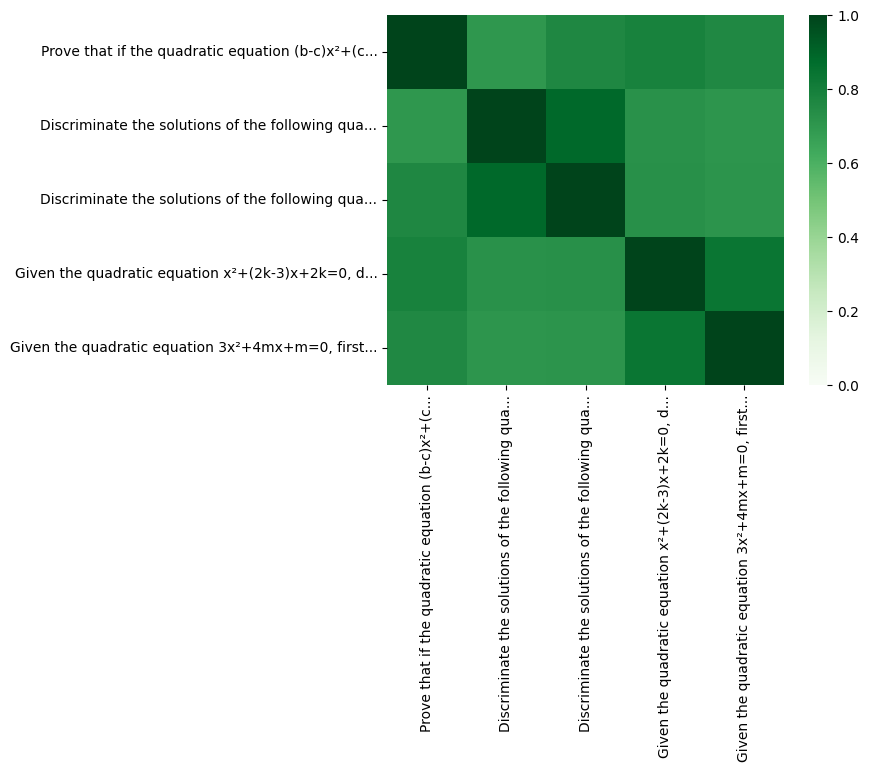

In [15]:
#Display the similarity in heatmap
import pandas as pd
import seaborn as sns


# Set up the embeddings in a dataframe.
df = pd.DataFrame([e.values for e in response.embeddings], index=truncated_texts)
# Perform the similarity calculation - cosine similarity
sim = df @ df.T
# Draw!
sns.heatmap(sim, vmin=0, vmax=1, cmap="Greens");

In [16]:
#Assess and textually capture the spectrum of similarity of the questions

sim_list = set()
for s in sim.values.tolist():
    if min(s) >= 0.7:
        sim_list.add("Strongly Similar")
    elif min(s) >= 0.5 and min(s) < 0.7:
        sim_list.add("Moderate")
    elif min(s) >= 0.3 and min(s) < 0.5:   
        sim_list.add("Weak")
    else:
        sim_list.add("Unrelated")

print(f"All questions are {sim_list}")
        

All questions are {'Strongly Similar', 'Moderate'}


## Essay Evaluation by AI Teacher
Second part of this project is to assess how the student has followed the structure of the Book Review Format outlined.
This also involves document understanding by LLM

In [17]:
#Tested other means of transcribing text from image
book_prompt = '''This is a book review written by a student. Transcribe all the images ordered by the page numbers at the top. Transcribe as-is without any corrections.'''

book_response = image_reader('/kaggle/input/book-report/', book_prompt)

print(book_response)

**Page 1**

Hello, and I will be writing about the first Harry Potter book, Harry Potter and the Sorcerer's stone. It is by Joanne Kathleen Rowling. Harry Potter is a fantasy novel series. I chose this book because it is written uniquely and very interesting.
Harry Potter is the main character, with his friends, Ron and Hermione, also in the most of the story. The story mostly takes place in the tower of Hogwarts Wizard's school, which had to take the train and boats to get to the Hogwarts castle. Everything was happy and peaceful at first for Harry, but then on the first dinner feast, a troll entered the school.
It started to enter the girl's bathroom, but Harry and Ron realized that Hermione was in there. They knocked the troll out, and she was saved, but one question remained: who let the troll in? But then Harry remembered that Snape, one of the teachers, wasn't with the teachers. He was in the corridors, heading to the third floor. This was some reasoning to Snape's recent suspici

In [18]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 63.7 MB/s eta 0:00:00:00:0100:01


In [19]:
#Read the guide
import fitz  # PyMuPDF

def read_pdf_text(file_path):
    doc = fitz.open(file_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text.strip()

pdf_text = read_pdf_text('/kaggle/input/book-review-format/Book Review Format.pdf')
#print(pdf_text)

In [20]:
def compare_documents(instruction_text, response_text):
    prompt = f"""
    You are an expert evaluator.
    
    Document A contains a set of instructions regarding how a book review should be written.
    Document B is a book review written by a student that is supposed to follow those instructions.
    
    Please determine if Document B follows the instructions in Document A. Highlight where the instructions are followed, and where they are not. Provide a rating from 1 to 10 on how well Document B adheres to the instructions, with reasoning.
    
    Document A (Instructions):
    \"\"\"
    {instruction_text}
    \"\"\"
    
    Document B (Response):
    \"\"\"
    {response_text}
    \"\"\"
    
    Now provide your evaluation:
    """

    response = client.models.generate_content(
        model='models/gemini-2.0-flash',
        #contents=["Transcribe this image",image]
        contents=[prompt]
    )
    #print(response.text)

    return response.text

# usage

evaluation = compare_documents(pdf_text, book_response)
print(evaluation)

Okay, here's an evaluation of Document B based on the instructions in Document A, with highlighting and a final rating:

**Document B Evaluation**

**Page 1**

*   **Introduction:**
    *   ✅ **Title of the book:** "Harry Potter and the Sorcerer's stone" - *Instruction Followed*
    *   ✅ **Author’s name:** "It is by Joanne Kathleen Rowling." - *Instruction Followed*
    *   ✅ **Genre:** "Harry Potter is a fantasy novel series." - *Instruction Followed*
    *   ✅ **Why you chose this book:** "I chose this book because it is written uniquely and very interesting." - *Instruction Followed*
*   **Summary:**
    *   ✅ **Main characters:** "Harry Potter is the main character, with his friends, Ron and Hermione, also in the most of the story." - *Instruction Followed*
    *   ✅ **Setting:** "The story mostly takes place in the tower of Hogwarts Wizard's school, which had to take the train and boats to get to the Hogwarts castle." - *Instruction Followed*
    *   ⚠️ **Plot Summary (with Spoil

## Scaling Idea - AI Teacher Guide
1) This can be scaled by creating an AI Teacher app, where images or pdf's can be uploaded or google sheet link of the questions and solutions of math problems can be shared and AI Teacher 
provides objective feedback based on the instructions. Also evaluates the distribution of how similar or varied the problems are when evaluating a set of questions. This will be helpful for the Teacher view.
2) Create a chatbot where the student can chat and ask specific questions about their essay. It can have a predefined questions that can be asked for objective feedback. More subjective feeback can also be sought with grounding for recency. 
